In [1]:
import psycopg2
from psycopg2 import OperationalError
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/15/Результаты симуляций/df_from_july_till november (1)')
df = df.drop(['Unnamed: 0'], axis = 1)

Деление на диапазоны

In [ ]:
df['tag'] = [-1]*len(df)

for i in range(len(df)):
  if i% 10000 == 0:
    print(i)
  if df['check_sum'][i] <= 1000:
    df['tag'][i] = 'diap_1'
  elif df['check_sum'][i] > 1000 and df['check_sum'][i] <= 1500:
    df['tag'][i] = 'diap_2'
  elif df['check_sum'][i] > 1500 and df['check_sum'][i] <= 2100:
    df['tag'][i] = 'diap_3'
  elif df['check_sum'][i] > 2100 and df['check_sum'][i] <= 2700:
    df['tag'][i] = 'diap_4'
  elif df['check_sum'][i] > 2700 and df['check_sum'][i] <= 3300:
    df['tag'][i] = 'diap_5'
  elif df['check_sum'][i] > 3300 and df['check_sum'][i] <= 4100:
    df['tag'][i] = 'diap_6'
  elif df['check_sum'][i] > 4100 and df['check_sum'][i] <= 5100:
    df['tag'][i] = 'diap_7'
  elif df['check_sum'][i] > 5100 and df['check_sum'][i] <= 6600:
    df['tag'][i] = 'diap_8'
  elif df['check_sum'][i] > 6600 and df['check_sum'][i] <= 9000:
    df['tag'][i] = 'diap_9'
  elif df['check_sum'][i] > 9000 and df['check_sum'][i] <= 14900:
    df['tag'][i] = 'diap_10'
  elif df['check_sum'][i] > 14900:
    df['tag'][i] = 'diap_11'

In [5]:
df['percent_of_total'] = df['amount']/df['check_sum']

In [6]:
df = df[df['amount'] > 0]

In [7]:
diap_1 = df[df['tag'] == 'diap_1'].copy().reset_index()
diap_2 = df[df['tag'] == 'diap_2'].copy().reset_index()
diap_3 = df[df['tag'] == 'diap_3'].copy().reset_index()
diap_4 = df[df['tag'] == 'diap_4'].copy().reset_index()
diap_5 = df[df['tag'] == 'diap_5'].copy().reset_index()
diap_6 = df[df['tag'] == 'diap_6'].copy().reset_index()
diap_7 = df[df['tag'] == 'diap_7'].copy().reset_index()
diap_8 = df[df['tag'] == 'diap_8'].copy().reset_index()
diap_9 = df[df['tag'] == 'diap_9'].copy().reset_index()
diap_10 = df[df['tag'] == 'diap_10'].copy().reset_index()
diap_11 = df[df['tag'] == 'diap_11'].copy().reset_index()


In [8]:
diap_1 = diap_1.drop(['index'], axis = 1)
diap_2 = diap_2.drop(['index'], axis = 1)
diap_3 = diap_3.drop(['index'], axis = 1)
diap_4 = diap_4.drop(['index'], axis = 1)
diap_5 = diap_5.drop(['index'], axis = 1)
diap_6 = diap_6.drop(['index'], axis = 1)
diap_7 = diap_7.drop(['index'], axis = 1)
diap_8 = diap_8.drop(['index'], axis = 1)
diap_9 = diap_9.drop(['index'], axis = 1)
diap_10 = diap_10.drop(['index'], axis = 1)
diap_11 = diap_11.drop(['index'], axis = 1)

Поиск выбросов в каждом диапазоне

In [9]:
diap_1 = diap_1[(diap_1['amount'] <= np.quantile(diap_1['amount'], 0.999)) & (diap_1['check_sum'] > 0)].copy().reset_index()
diap_2 = diap_2[diap_2['amount'] <= np.quantile(diap_2['amount'], 0.999)].copy().reset_index()
diap_3 = diap_3[diap_3['amount'] <= np.quantile(diap_3['amount'], 0.999)].copy().reset_index()
diap_4 = diap_4[diap_4['amount'] <= np.quantile(diap_4['amount'], 0.999)].copy().reset_index()
diap_5 = diap_5[diap_5['amount'] <= np.quantile(diap_5['amount'], 0.999)].copy().reset_index()
diap_6 = diap_6[diap_6['amount'] <= np.quantile(diap_6['amount'], 0.999)].copy().reset_index()
diap_7 = diap_7[diap_7['amount'] <= np.quantile(diap_7['amount'], 0.999)].copy().reset_index()
diap_8 = diap_8[diap_8['amount'] <= np.quantile(diap_8['amount'], 0.999)].copy().reset_index()
diap_9 = diap_9[diap_9['amount'] <= np.quantile(diap_9['amount'], 0.999)].copy().reset_index()
diap_10 = diap_10[diap_10['amount'] <= np.quantile(diap_10['amount'], 0.999)].copy().reset_index()
diap_11 = diap_11[(diap_11['amount'] <= np.quantile(diap_11['amount'], 0.999)) & (diap_11['check_sum'] <= np.quantile(diap_11['check_sum'], 0.999))].copy().reset_index()

In [10]:
dfr = pd.concat([diap_1, diap_2, diap_3, diap_4, diap_5, diap_6, diap_7, diap_8, diap_9,diap_10, diap_11], axis = 0)

Дисперсия

In [ ]:
pip install pingouin

In [13]:
import pingouin as pg
import scipy. stats as stats
import statistics
import random

In [41]:
d1 = diap_1['percent_of_total'].sample(1000)
d2 = diap_2['percent_of_total'].sample(1000)
d3 = diap_3['percent_of_total'].sample(1000)
d4 = diap_4['percent_of_total'].sample(1000)
d5 = diap_5['percent_of_total'].sample(1000)
d6 = diap_6['percent_of_total'].sample(1000)
d7 = diap_7['percent_of_total'].sample(1000)
d8 = diap_8['percent_of_total'].sample(1000)
d9 = diap_9['percent_of_total'].sample(1000)
d10 = diap_10['percent_of_total'].sample(1000)
d11 = diap_11['percent_of_total'].sample(1000)

In [42]:
import seaborn as sns

<ipython-input-43-ac886a3f05ab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(d1)


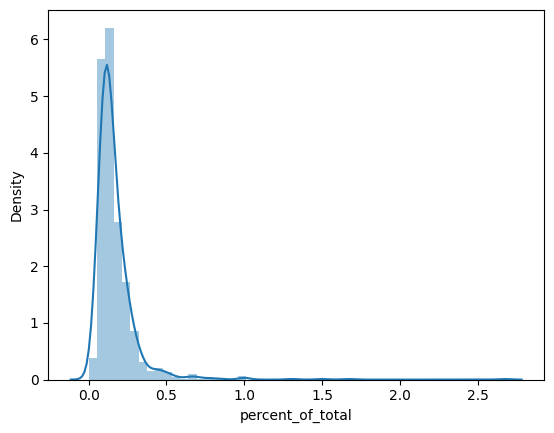

In [43]:
sns_plot = sns.distplot(d1)
fig = sns_plot.get_figure()

<ipython-input-44-264c0651dda8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(d2)


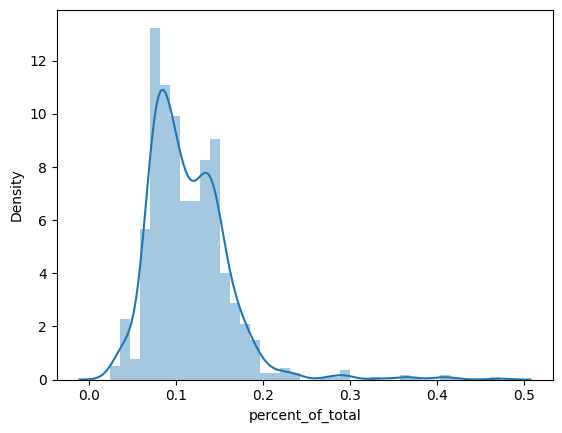

In [44]:
sns_plot = sns.distplot(d2)
fig = sns_plot.get_figure()

<ipython-input-45-1dff3097799e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(d3)


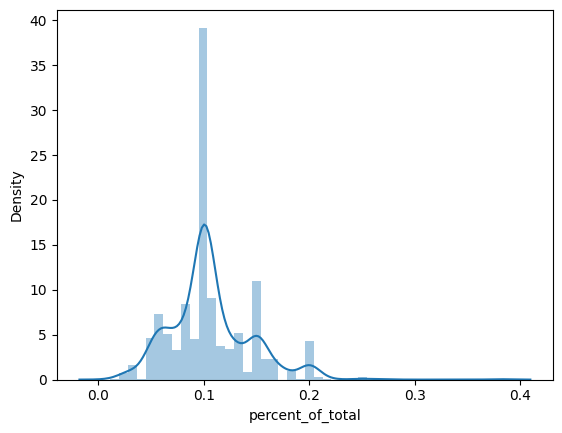

In [45]:
sns_plot = sns.distplot(d3)
fig = sns_plot.get_figure()

<ipython-input-46-4532e74c4e14>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(d4)


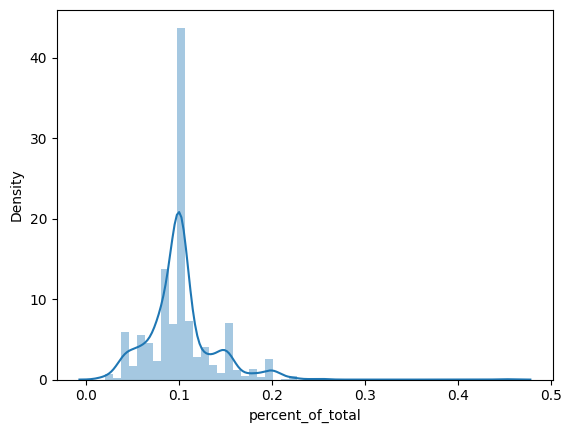

In [46]:
sns_plot = sns.distplot(d4)
fig = sns_plot.get_figure()

<ipython-input-47-71c469007e5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(d5)


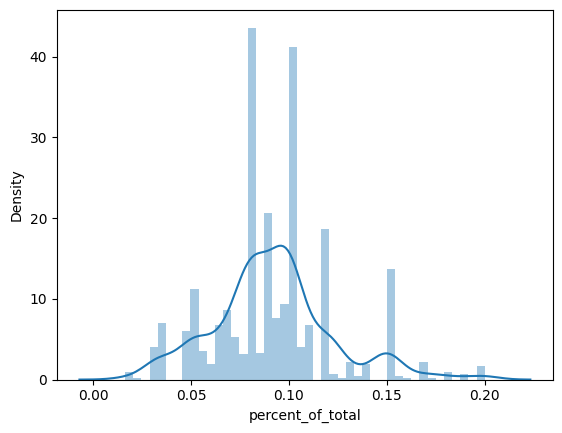

In [47]:
sns_plot = sns.distplot(d5)
fig = sns_plot.get_figure()

<ipython-input-22-bb79bfdcc592>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(d6)


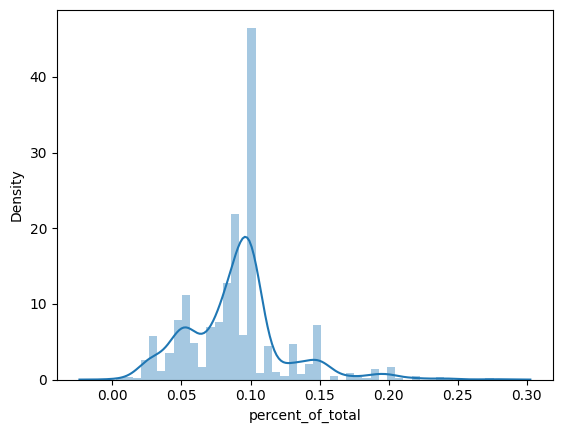

In [22]:
sns_plot = sns.distplot(d6)
fig = sns_plot.get_figure()

<ipython-input-48-fbc6b37d334c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(d7)


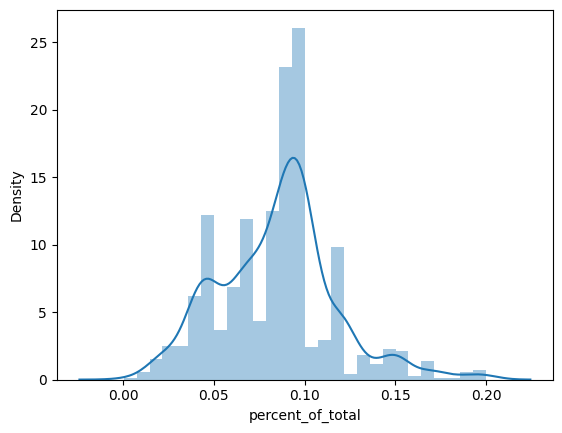

In [48]:
sns_plot = sns.distplot(d7)
fig = sns_plot.get_figure()

<ipython-input-49-9e3f226dadd1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(d8)


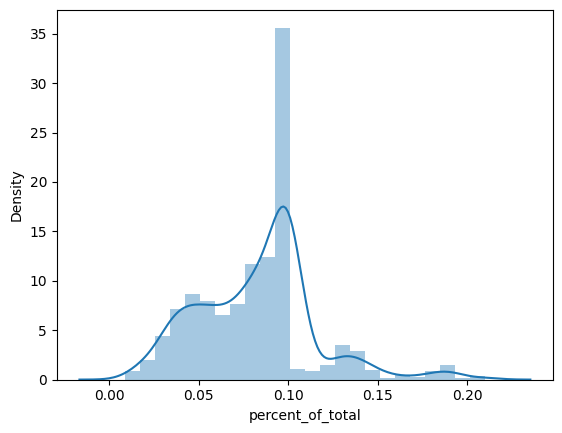

In [49]:
sns_plot = sns.distplot(d8)
fig = sns_plot.get_figure()

<ipython-input-50-ffc494a92738>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(d9)


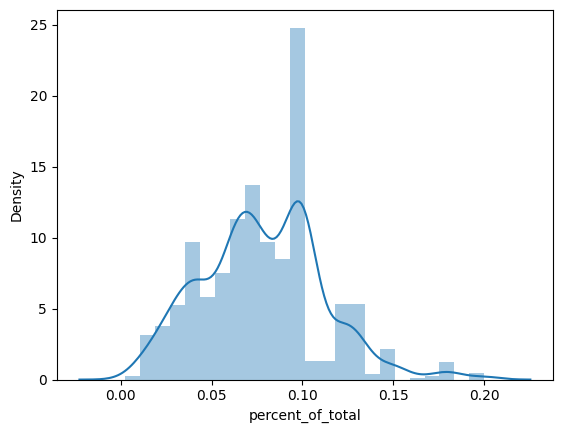

In [50]:
sns_plot = sns.distplot(d9)
fig = sns_plot.get_figure()

<ipython-input-51-ad89e53d3b02>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(d10)


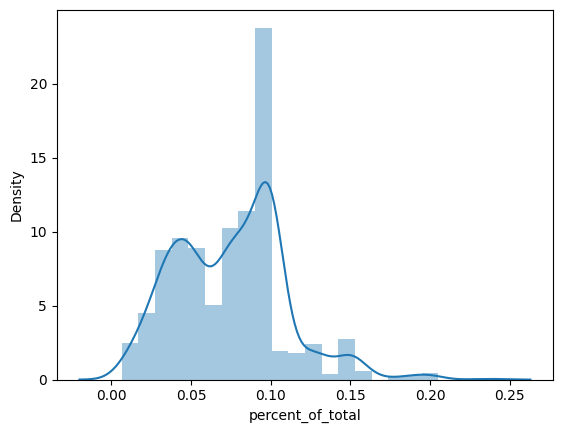

In [51]:
sns_plot = sns.distplot(d10)
fig = sns_plot.get_figure()

<ipython-input-52-e4861308dee8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(d11)


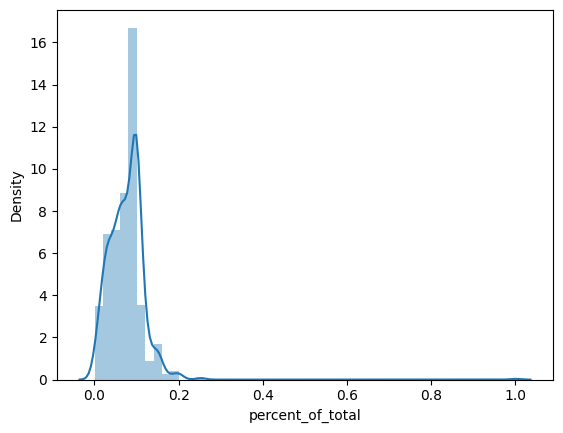

In [52]:
sns_plot = sns.distplot(d11)
fig = sns_plot.get_figure()

Тест Левена на равные отклонения. Пороговое значение $\alpha$ = 0.01
1. Нулевая гипотеза: все 11 групп имеют равные дисперсии
2. Есть группы с отличной дисперсией

In [53]:
leven_res = stats.levene(d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, center = 'trimmed')

In [54]:
leven_res.pvalue < 0.01

True

Значение p из теста Левена меньше, чем α = 0,01, что означает, что мы можем 
отвергнуть нулевую гипотезу о том, что каждая группа имеет одинаковую дисперсию.
Таким образом, предположение о равных дисперсиях нарушается, и мы можем приступить к выполнению дисперсионного анализа Уэлча.

Дисперсионный анализ Уэлча with trimmed means and winsorized variances

In [56]:
from statsmodels.stats import oneway

In [57]:
b1 = pd.DataFrame({'p': d1, 'group': ['diap_1'] * 1000})
b2 = pd.DataFrame({'p': d2, 'group': ['diap_2'] * 1000})
b3 = pd.DataFrame({'p': d3, 'group': ['diap_3'] * 1000})
b4 = pd.DataFrame({'p': d4, 'group': ['diap_4'] * 1000})
b5 = pd.DataFrame({'p': d5, 'group': ['diap_5'] * 1000})
b6 = pd.DataFrame({'p': d6, 'group': ['diap_6'] * 1000})
b7 = pd.DataFrame({'p': d7, 'group': ['diap_7'] * 1000})
b8 = pd.DataFrame({'p': d8, 'group': ['diap_8'] * 1000})
b9 = pd.DataFrame({'p': d9, 'group': ['diap_9'] * 1000})
b10 = pd.DataFrame({'p': d10, 'group': ['diap_10'] * 1000})
b11 = pd.DataFrame({'p': d11, 'group': ['diap_11'] * 1000})

In [58]:
dfr = pd.DataFrame([])
dfr = pd.concat([b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11], axis = 0)
dfr

,p,group
752554,0.519481,diap_1
558777,0.186335,diap_1
923576,0.147059,diap_1
349669,0.217391,diap_1
171862,0.069444,diap_1
...,...,...
50479,0.100000,diap_11
43431,0.200028,diap_11
13457,0.130040,diap_11
65244,0.100031,diap_11


Нулевая гипотеза: заметных различий между группами нет.
Альтернативная гипотеза: между группами есть заметное различие.


In [59]:
welch_anova_res = oneway.anova_oneway(data = dfr['p'], groups=dfr['group'], use_var='unequal', welch_correction=True, trim_frac=0.05)

In [60]:
welch_anova_res.pvalue < 0.01

True

Значение p-value меньше, чем выбранный уровень значимости α, что означает, что мы можем отклонить нулевую гипотезу о том, что средние проценты от чека равны на разных суммах чека

**Выполним апостериорный тест Games Howell**

In [61]:
result = pg.pairwise_gameshowell(dv='p', between='group', data=dfr)

In [62]:
len(result[result['pval'] >= 0.01])

8

47 пар из 55 имеют статистически значимые различия поэтому моделирование должно производиться на различных интервалах суммы чека